In [1]:
%matplotlib inline
from pprint import pprint
from collections import defaultdict

import numpy as np
import math
import matplotlib.pyplot as plt
import random
import warnings

#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import SGDClassifier
import sklearn.tree
import sklearn.ensemble

from sklearn.grid_search import GridSearchCV
from sklearn import metrics

import sys
sys.path.append('../dev')

from ml_plot import plot_validation_curve
from ml_plot import PredictCV, my_plot_learning_curve
from ml_plot import plot_prediction_curve
from ml_plot import get_dataset, eval_predictions

# Configuration

In [2]:
# PROJECT = 'nova'
# PROJECT = 'swift'
# PROJECT = 'cinder'
PROJECT = 'heat'
# PROJECT = 'glance'

# IMPORTANCE = 'crit'
# IMPORTANCE = 'high+'
IMPORTANCE = 'med+'
# IMPORTANCE = 'low+'

# SIZE = 100
#SIZE = 250
# SIZE = 0.1
SIZE = 0.5

SCORING = 'f1'         # (precision * recall) / (precision + recall)
# SCORING = 'accuracy'   # (TP + TN) / all values
# SCORING = 'precision'  # TP / (TP + FP)
# SCORING = 'recall'     # TP / (TP + FN)
# SCORING = 'average_precision'
# SCORING = 'roc_auc'

JOBS = 4

VERBOSE = 0

#warnings.simplefilter("ignore", UndefinedMetricWarning)
warnings.filterwarnings("ignore", 'F-score is ill-defined')

# Load Data

In [3]:
%%capture
Y, X = get_dataset(PROJECT, IMPORTANCE)

### Select Split Strategy

In [4]:
cv = PredictCV(len(Y), history=1000, future=500, n_iter=10)

# Decision Tree Classifier

In [5]:
estimator = sklearn.tree.DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'], 
                  'max_features':['auto', 'log2', 10, 25, 50, 75, 100, 150, 200]  }

In [6]:
grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv, scoring=SCORING,
                    n_jobs=JOBS, pre_dispatch=2*JOBS, verbose=VERBOSE)
# grid.fit(X_train, Y_train)
grid.fit(X, Y)
print 'best_score: ', grid.best_score_
clf = grid.best_estimator_
grid.best_estimator_

best_score:  0.388241149317


DecisionTreeClassifier(compute_importances=None, criterion='entropy',
            max_depth=None, max_features=75, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

### Validation Curves

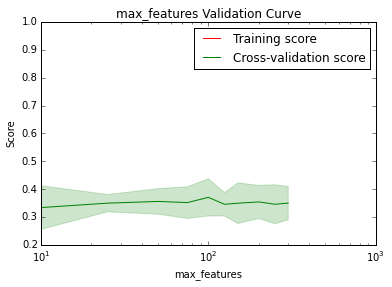

Best score of 0.370920659002 when setting max_features to 100


In [7]:
best_score, param_val, param_name = \
    plot_validation_curve(clf,
                          X, Y,
                          "max_features", [10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
                          "max_features Validation Curve",
                          cv=cv, scoring=SCORING, n_jobs=JOBS)
print 'Best score of', best_score, 'when setting', param_name, 'to',  param_val

### Learning Curve

<module 'matplotlib.pyplot' from '/Users/doug/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

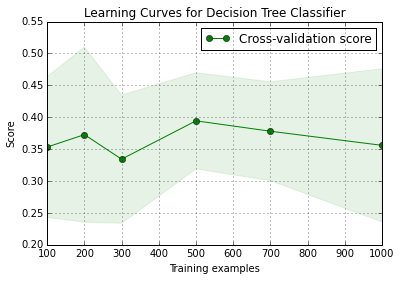

In [8]:
title = "Learning Curves for Decision Tree Classifier"
my_plot_learning_curve(clf, title, X, Y,
                           n_jobs=JOBS, future=200,
                           history_sizes=[100, 200, 300, 500, 700, 1000])

### Prediction Curve

<module 'matplotlib.pyplot' from '/Users/doug/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

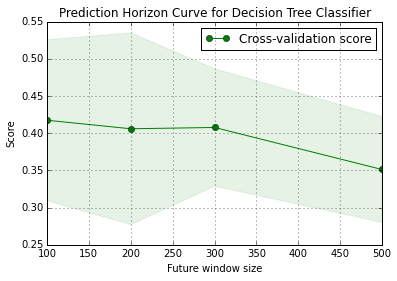

In [9]:
title = "Prediction Horizon Curve for Decision Tree Classifier"
plot_prediction_curve(clf, title, X, Y,
                           n_jobs=JOBS, history=500,
                           future_sizes=[100, 200, 300, 500])

In [10]:
DT_results = eval_predictions(clf, X, Y, history_sizes=[300, 500, 1000], future_sizes=[100, 200, 500])

** Predictions for hist=300 future=100 **

F1:        0.36  +/- 0.16
Accuracy:  0.66  +/- 0.08
Precision: 0.41  +/- 0.21
Recall:    0.34  +/- 0.15

Aggregate Confusion Matrix - 10 iterations
[[548 144]
 [193 115]]


** Predictions for hist=300 future=200 **

F1:        0.39  +/- 0.14
Accuracy:  0.65  +/- 0.09
Precision: 0.42  +/- 0.09
Recall:    0.42  +/- 0.19

Aggregate Confusion Matrix - 10 iterations
[[1033  356]
 [ 341  270]]


** Predictions for hist=300 future=500 **

F1:        0.35  +/- 0.09
Accuracy:  0.65  +/- 0.06
Precision: 0.35  +/- 0.09
Recall:    0.35  +/- 0.11

Aggregate Confusion Matrix - 10 iterations
[[2765  868]
 [ 862  505]]


** Predictions for hist=500 future=100 **

F1:        0.43  +/- 0.11
Accuracy:  0.67  +/- 0.07
Precision: 0.46  +/- 0.15
Recall:    0.44  +/- 0.12

Aggregate Confusion Matrix - 10 iterations
[[532 163]
 [169 136]]


** Predictions for hist=500 future=200 **

F1:        0.37  +/- 0.12
Accuracy:  0.66  +/- 0.10
Precision: 0.40  +/- 0.10
Recall:

In [11]:
DT_clf = clf